## EDA:
* What is the distribution of reviews by year+month?
* What is the distribution of scores by year+month?
* What is the trend for number of reviews over the timespan of the dataset
* What is the trend for scores over the timespan of the dataset

In [37]:
# Import the required libraries
import pandas as pd
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns

%matplotlib inline

In [38]:
# Functions

def show_unstackedbar_plot(my_data, my_figsize, my_colormap, my_titletext, my_xlabeltext, my_ylabeltext):
    my_data.unstack().plot.bar(fontsize=12, rot=45, alpha=0.85, figsize=my_figsize, colormap=my_colormap)
    plt.grid(color='black', alpha=0.1, linestyle ='-', linewidth=1)
    plt.title(my_titletext, size='16')
    plt.xlabel(my_xlabeltext, size='14')
    plt.ylabel(my_ylabeltext, size='14')
    plt.yticks(size=12)
    plt.show()



In [39]:
# Read in the collected and prepared data
cookpad_reviews_df = pd.read_csv('../data/cookpad_recent_reviews.csv')
cookpad_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4276 entries, 0 to 4275
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              4276 non-null   object
 1   userName              4276 non-null   object
 2   content               4276 non-null   object
 3   score                 4276 non-null   int64 
 4   reviewCreatedVersion  4276 non-null   object
 5   reviewTimestamp       4276 non-null   object
 6   replyContent          20 non-null     object
 7   repliedAt             20 non-null     object
 8   reviewYear            4276 non-null   int64 
 9   reviewDateString      4276 non-null   object
dtypes: int64(2), object(8)
memory usage: 334.2+ KB


In [40]:
# min and max year for Review - Assuming time is in GMT. Verify this if possible.
print('min review time')
print(cookpad_reviews_df['reviewYear'].min())
print(cookpad_reviews_df['reviewTimestamp'].min())

print('max review time')
print(cookpad_reviews_df['reviewYear'].max())
print(cookpad_reviews_df['reviewTimestamp'].max())

min review time
2019
2019-01-01 04:27:45
max review time
2021
2021-04-02 09:25:12


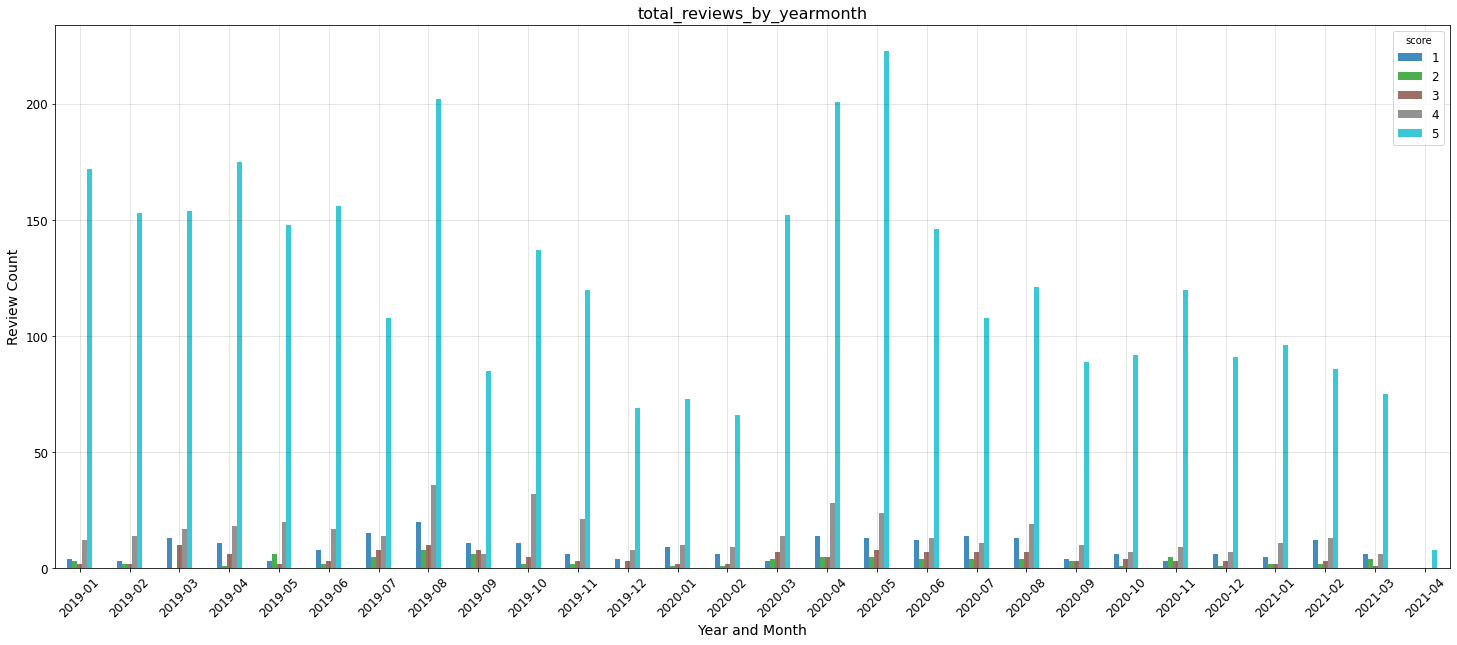

In [41]:
total_reviews_by_yearmonth = cookpad_reviews_df.groupby(['reviewDateString', 'score'])['reviewId'].count()

show_unstackedbar_plot(my_data=total_reviews_by_yearmonth, 
                       my_figsize=(25,10),
                       my_colormap='tab10',
                       my_titletext='total_reviews_by_yearmonth', 
                       my_xlabeltext='Year and Month',
                       my_ylabeltext='Review Count')

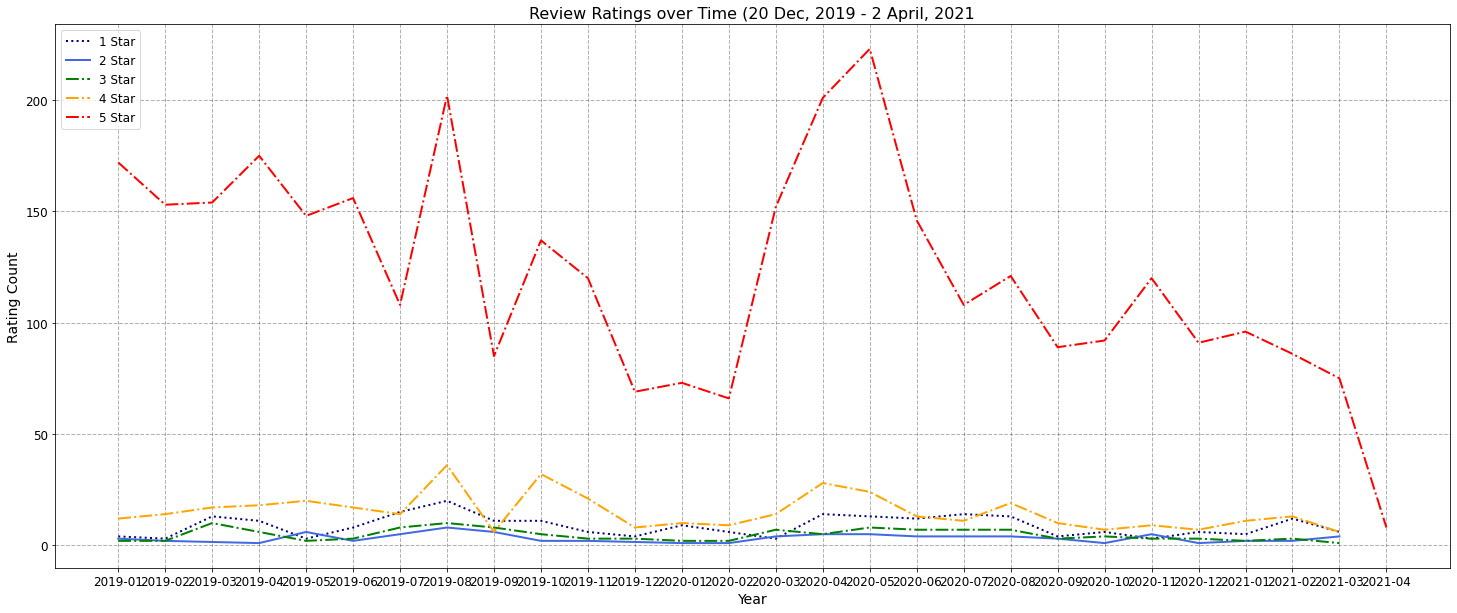

In [45]:
star1_by_year = cookpad_reviews_df[cookpad_reviews_df['score'] == 1].groupby(['reviewDateString'])['reviewId'].count()
star2_by_year = cookpad_reviews_df[cookpad_reviews_df['score'] == 2].groupby(['reviewDateString'])['reviewId'].count()
star3_by_year = cookpad_reviews_df[cookpad_reviews_df['score'] == 3].groupby(['reviewDateString'])['reviewId'].count()
star4_by_year = cookpad_reviews_df[cookpad_reviews_df['score'] == 4].groupby(['reviewDateString'])['reviewId'].count()
star5_by_year = cookpad_reviews_df[cookpad_reviews_df['score'] == 5].groupby(['reviewDateString'])['reviewId'].count()


plt.rc('font', size=14) #controls default text size
plt.rc('axes', titlesize=16) #fontsize of the title
plt.rc('axes', labelsize=14) #fontsize of the x and y labels
plt.rc('xtick', labelsize=12) #fontsize of the x tick labels
plt.rc('ytick', labelsize=12) #fontsize of the y tick labels
plt.rc('legend', fontsize=12) #fontsize of the legend

plt.figure(figsize=(25, 10))
plt.plot(star1_by_year.index, star1_by_year, color='navy', linewidth=2.0, linestyle=':')
plt.plot(star2_by_year.index, star2_by_year, color='royalblue', linewidth=2.0, linestyle='-')
plt.plot(star3_by_year.index, star3_by_year, color='green', linewidth=2.0, linestyle='-.')
plt.plot(star4_by_year.index, star4_by_year, color='orange', linewidth=2.0, linestyle='-.')
plt.plot(star5_by_year.index, star5_by_year, color='red', linewidth=2.0, linestyle='-.')
plt.grid(color = 'black', alpha = 0.3, linestyle = '--', linewidth = 1)

plt.title('Review Ratings over Time (20 Dec, 2019 - 2 April, 2021')
plt.xlabel('Year')
plt.ylabel('Rating Count')
plt.legend(['1 Star','2 Star','3 Star','4 Star', '5 Star'], loc=2)
plt.show()